# pycoQC

___
**pycoQC is a Python 3 package for Jupyter Notebook, computing metrics and generating simple QC plots from Oxford Nanopore technologies (ONT) Albacore basecaller**
___

pycoQC is a very simple quality control package for Nanopore data written in pure python3, meant to be used directly in a jupyter notebook 4.0.0 +. As opposed to current and more exhaustive QC programs for nanopore data, pycoQC is very fast as it relies entirely on the *sequencing_summary.txt* file generated by ONT Albacore Sequencing Pipeline Software 1.2.1+, during base calling. Consequently, pycoQC will only provide read level metrics (and not at base level)

At the time of the package writing, Albacore 1.2.1 generates a tabulated file  with the following fields 'filename', **'run_id'**, **'channel**', **'start_time'**, **'duration'**, **'num_events'**, 'template_start', 'num_events_template', 'template_duration', 'num_called_template', **'sequence_length_template'**, **'mean_qscore_template'**, 'strand_score_template' (the fields in bold are used by pycoQC).

Please be aware that pycoQC is an experimental package that is still under development. It was tested under Linux Ubuntu 16.04 and in an HPC environment running under Red Hat Enterprise 7.1. You are welcome to raise issues, contribute to the development and submit patches or updates.

## Installation

Ideally, before installation, create a clean python3 virtual environment to deploy the package, using virtualenvwrapper for example (see http://www.simononsoftware.com/virtualenv-tutorial-part-2/).

### Option 1: Direct installation with pip from github

Install the package with pip. All the required dependencies will be automatically installed.

In [ ]:
pip3 install git+https://github.com/a-slide/pycoQC.git

To update the package:

In [ ]:
pip3 install git+https://github.com/a-slide/pycoQC.git --upgrade

### Option 2: Clone the repository and install locally in develop mode

With this option, the package will be locally installed in “editable” or “develop” mode. This allows the package to be both installed and editable in project form. This is the recommended option if you wish to participate to the development of the package. As for the option before, the required dependencies will be automatically installed.

In [ ]:
git clone https://github.com/a-slide/pycoQC.git
cd pycoQC
chmod u+x setup.py
pip3 install -e ./

With this option you can also run the testing notebook located in the source directory *pycoQC/test_pycoQC.ipynb*

### Option 3: Local installation without pip 

This option is also suitable if you are interested in further developing the package, but requires a little bit more hands-on.

* Clone the repository locally

In [ ]:
git clone https://github.com/a-slide/pycoQC.git

* Add the package directory (./pycoQC/pycoQC) to you python3 PATH (depending on you OS and whether you want it to be permanent ot not)

* Install the dependencies (numpy, pandas, matplotlib, seaborn and notebook)

In [ ]:
pip3 install numpy pandas matplotlib seaborn notebook

## Usage

The package is meant to be used in a jupyter notebook 4.0.0 +

### Running jupyter in a virtualenv

If you installed the package in a virtual environment with virtualenvwrapper, jupyter can run on the virtualenv:

* Create a python3 virtualenv or activate an existing one

In [ ]:
mkvirtualenv --python=python3 virtualenv-name
# Or
workon virtualenv-name

* Install the ipython kernel module into your virtualenv

In [ ]:
pip3 install ipykernel

* Now run the kernel "self-install" script:

In [ ]:
python -m ipykernel install --user --name=virtualenv-name # Replacing the --name parameter as appropriate.

* You should now be able to see your kernel in the IPython notebook menu: Kernel -> Change kernel and be able so switch to it (you may need to refresh the page before it appears in the list). IPython will remember which kernel to use for that notebook from then on.

### Notebook setup

* Launch the notebook, navigate in the directory where you want to work and create a new python3 notebook

In [ ]:
jupyter notebook

* Import pylab (from matplotlib + numpy) and use %pylab magic command to enable plotting in the current Notebook.

In [1]:
import pylab as pl # Namespace containing numpy + matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


* Default pylab parameters can be defined at the beginning of the notebook as well (see http://matplotlib.org/users/customizing.html for more options)

In [2]:
pl.rcParams['figure.figsize'] = 20,7
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')

### Using pycoQC

* Import pycoQC main class

In [15]:
from pycoQC.pycoQC import pycoQC as pcq

* A sample test file generated by Albacore can be obtained from the package data using *pkg_resources*, or you can use your own file

In [4]:
from pkg_resources import Requirement, resource_filename
sequencing_summary_file = resource_filename(Requirement.parse("pycoQC"),'pycoQC/data/sequencing_summary.txt')

* Load the sequencing_summary file (verbose mode will give you additional information while parsing the file)

In [5]:
p = pcq(sequencing_summary_file)
print(p)

pycoQC instance
	Parameters list
	runid	ad3de3b63de71c4c6d5ea4470a82782cf51210d9
	seq_summary_file	/home/aleg/Programming/Python3/pycoQC/pycoQC/data/sequencing_summary.txt
	total_reads	126583
	verbose	False



* Generate a basic overview of the data using the *overview* function

,Count
Reads,126583
Bases,1182258096
Events,2171928526
Active Channels,507
Run Duration (h),47.9615


,Quality score distribution,Read length distribution
count,126583.000000,126583.000000
mean,10.999623,9339.785722
std,2.093108,12618.058576
min,2.347000,5.000000
10%,7.649000,732.000000
25%,9.534000,2053.000000
50%,11.526000,3518.000000
75%,12.672000,10887.000000
90%,13.300000,28927.800000
max,15.310000,49917.000000


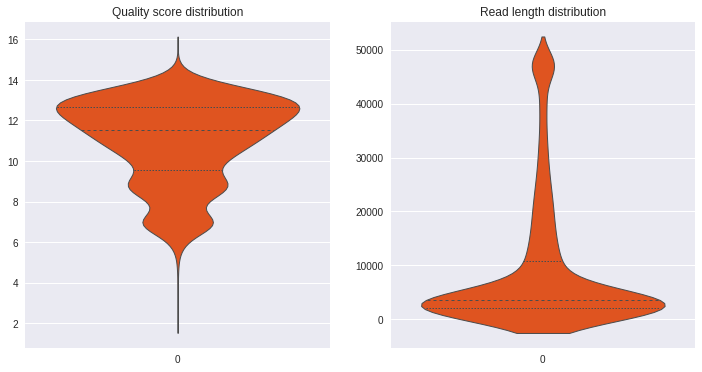

In [6]:
p.overview()

* Low/high quality and short/long reads can be excluded from the subsequent analyses  

In [7]:
p.trim_read_len(min_len=25)

177 short reads were removed


In [8]:
p.trim_read_qual(min_qual=5)

50 low quality reads were removed


Plots can be generated by calling the pycoCQ object with one of the 6 available plotting functions.

Each function has specific options that are comprehensively detailed in the testing notebook provided with the package or in html version on nbviewer: [link to test_notebook](https://nbviewer.jupyter.org/github/a-slide/pycoQC/blob/master/pycoQC/test_pycoQC.ipynb?flush_cache=true)

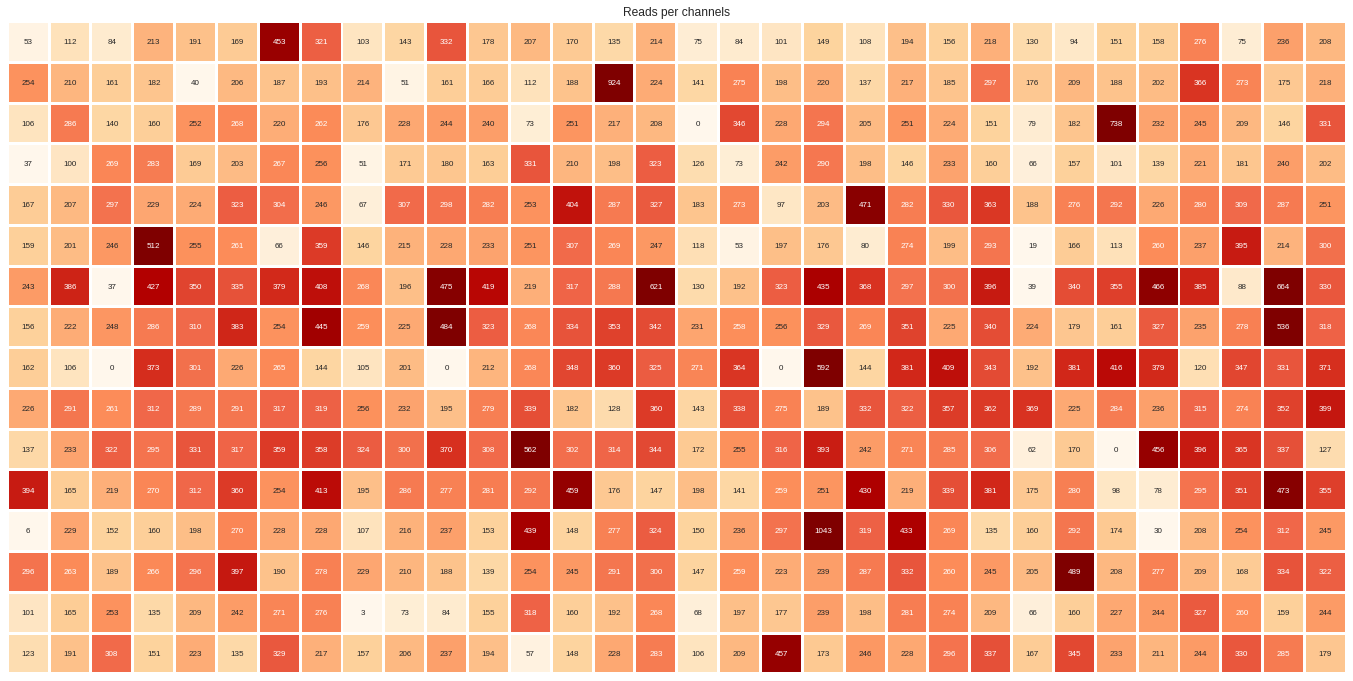

In [9]:
g = p.channels_activity()

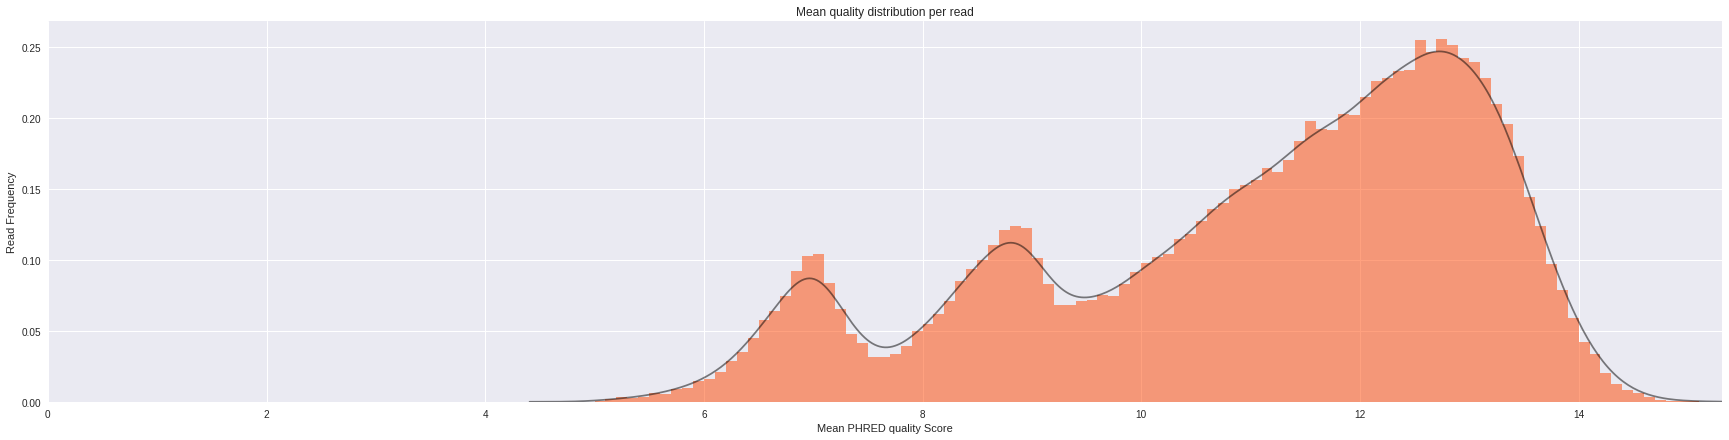

In [10]:
g = p.mean_qual_distribution()

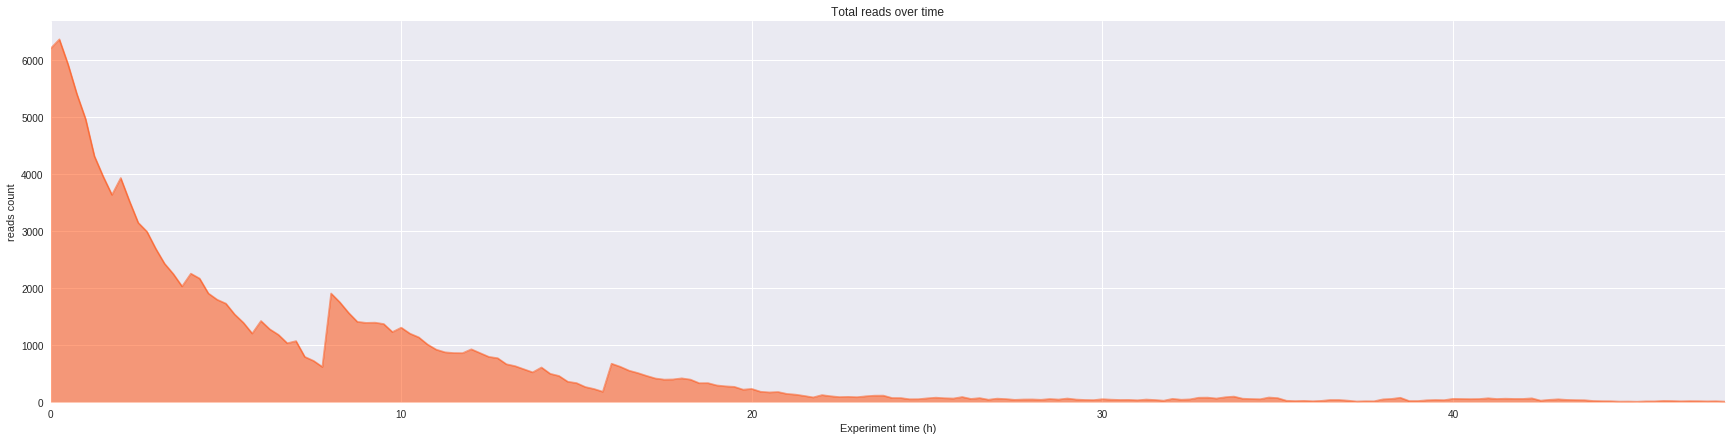

In [11]:
g = p.output_over_time()

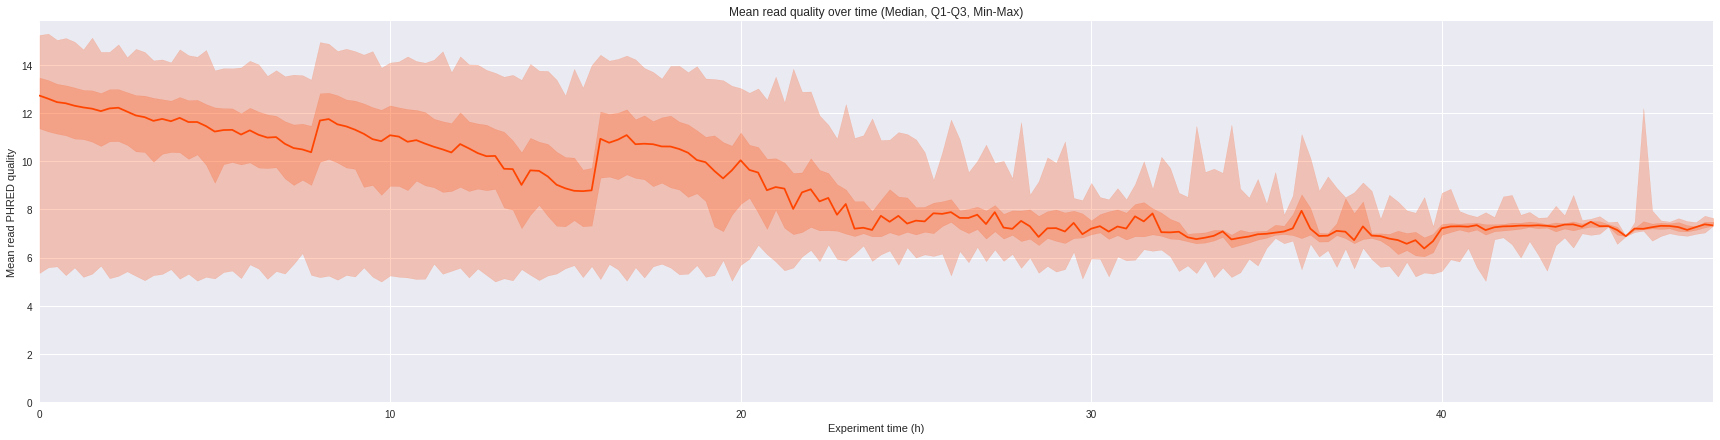

In [12]:
g = p.quality_over_time()

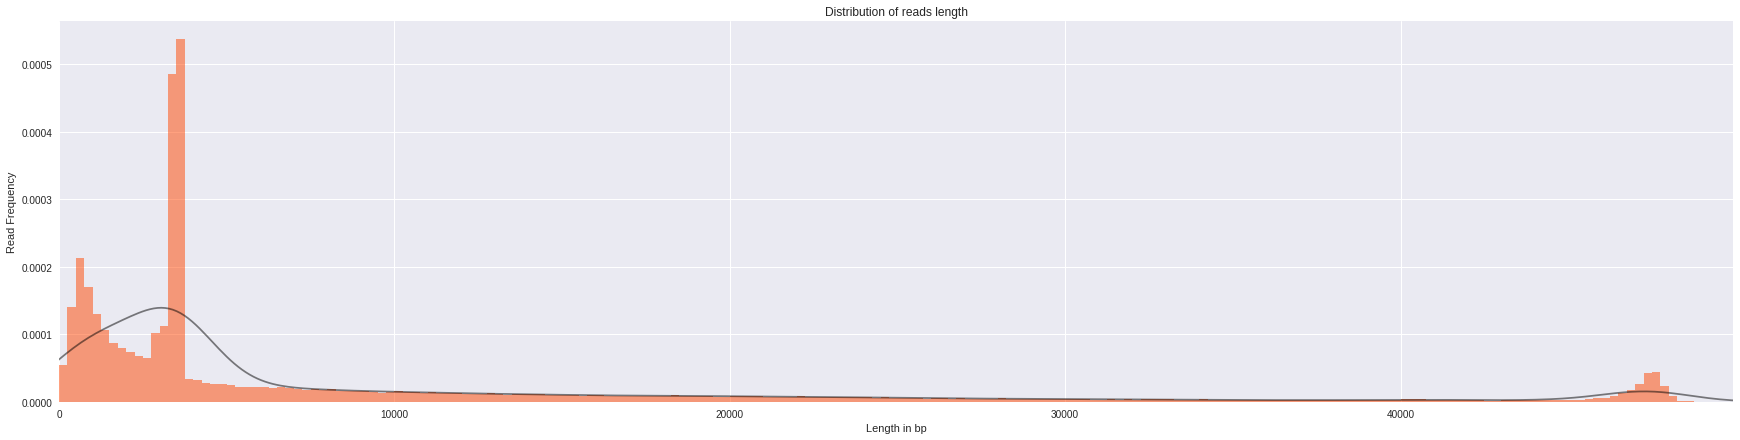

In [13]:
g = p.reads_len_distribution()

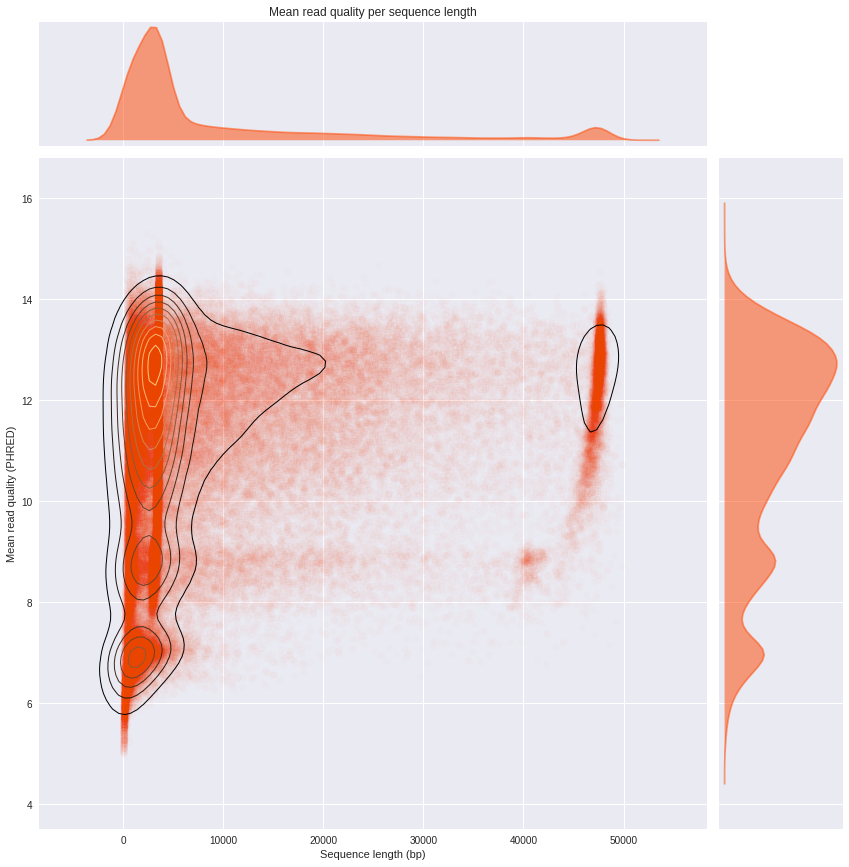

In [14]:
g = p.reads_len_quality()

## Authors and Contact

Adrien Leger - 2017

Enright's group, EMBL EBI

* <aleg@ebi.ac.uk>
* [Github](https://github.com/a-slide)